# Исследование объявлений о продаже квартир

**Цель исследования** — проверить гипотезы:
1. Выяснить какие квартиры чаще всего представлены на рынке.
2. Вычислить какие факторы влияют на стоимость квартиры, а какие-нет. 
3. Узнать наиболее популярные населенные пункты по продаже недвижимости, цены за квадратный метр и как меняются цены в зависимости от удаления от центра.
**Ход исследования**
 1. Обзор данных.
 2. Предобработка данных.
 3. Расчет и визуализация необходимых данных.
 4. Проверка гипотез.

## Обзор данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
try:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t') # прочитать файл
except FileNotFoundError as e:
    print(repr(e))
    data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')

In [ ]:
def prepare(df): #фунция предобработки данных
    display(df.head())
    display(df.info())
    display(df.isna().sum())
    display(df.duplicated().sum())

In [ ]:
prepare(data)

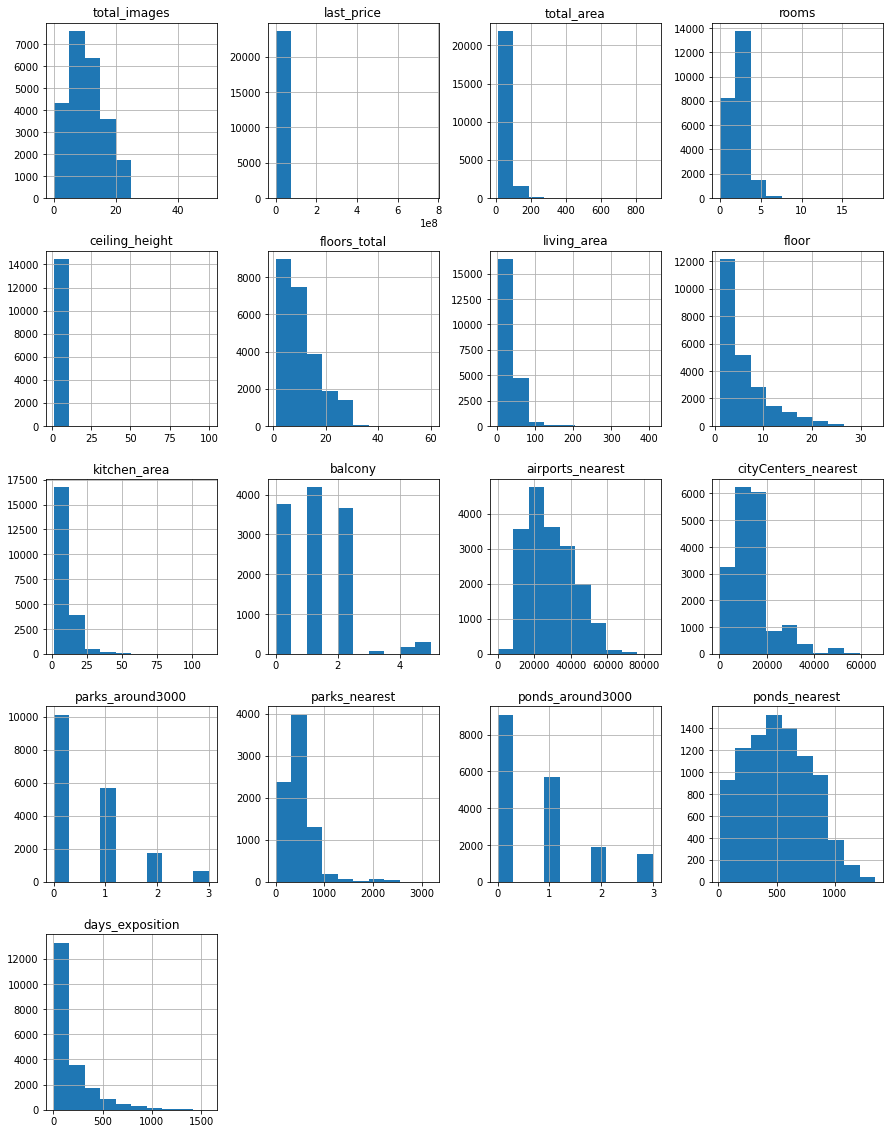

In [5]:
data.hist(figsize =(15, 20));

## Предобработка данных

In [8]:
data = data.rename(
columns={
'is_apartment': 'apartment',
'locality_name': 'city',
'cityCenters_nearest': 'city_centers_nearest',
'parks_around3000': 'parks_around_3000_m',
'ponds_around3000': 'ponds_around_3000_m',
}
) #преименовываем столбцв в приличный змеиный формат

In [9]:
data['last_price'] = data['last_price'].astype('int') #изменила тип данных, не копейки же считать:)

In [10]:
data['ceiling_height'].unique() #проверила уникальные значения по высоте потолков

array([  2.7 ,    nan,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,
         3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,
         2.58,   3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,
         2.45,   3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,
         3.16,   3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,
         5.  ,   2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,
         2.83,   4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,
         3.18,   3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,
         2.63,   3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,
         3.66,   3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,
         3.36,  32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,
      

In [11]:
def normal_height (height):
    if (height > 10):
        return height/10
    return height

In [12]:
data['ceiling_height'] = data['ceiling_height'].apply(normal_height)
ceiling_mediana = data['ceiling_height'].median()
data['ceiling_height'] = data['ceiling_height'].where(((data['ceiling_height'] > 2) & (data['ceiling_height'] < 10)), ceiling_mediana)
#убрала те что меньше 2 и больше 8, потому что это из ряда фантастики и те что кривые привела в нормальный вид, 
#проверила уникальные значения, заполнила пропуски медианным значением.

In [13]:
data['floors_total'] = data['floors_total'].fillna(0)
data['floors_total'] = data['floors_total'].astype('int')
data['floors_total'].unique()
#все значения целочисленные, поэтому чтобы занимало меньше места переведем в инт.

array([16, 11,  5, 14, 12, 26, 24, 27,  9,  6, 17, 25,  3, 23, 19, 18,  4,
       22,  8,  2, 10,  7, 13, 15,  0, 20, 28, 36, 21, 35, 34, 60,  1, 29,
       33, 52, 37])

In [14]:
data['living_area'] = data['living_area'].fillna(data['living_area'].median()) 
data['living_area'].unique()
#аномальных нет, тип данных соответствующий, пропуски заполнила медианой, тк не мало, а в расчетах участвует.

array([51.  , 18.6 , 34.3 , ..., 31.65, 13.59, 42.55])

In [15]:
data['apartment'] = data['apartment'].fillna(False) 
data['apartment'] = data['apartment'].astype('bool')
data['apartment'].unique()
#заменила пропуски на False в апартаментах, если они там были значит жилье скорее всего является квартирой.

array([False,  True])

In [16]:
data['kitchen_area'].unique() 
median_kitchen = data['kitchen_area'].median()
data['kitchen_area'] = data['kitchen_area'].fillna(value = median_kitchen)
#аномальных нет, тип данных устраивает, пропуски заполнила медианой, тк площадь кухни участвует в ключевых расчетах.

In [17]:
data['balcony'] = data['balcony'].fillna(0) #заменила пропуски на 0, тк скорее всего они означают, что балкона нет.
data['balcony'] = data['balcony'].astype('int')
data['balcony'].unique() #заменила тип данных, тк количество балконов является целочисленным значением.

array([0, 2, 1, 5, 4, 3])

In [18]:
data['city'].unique() #проверяю уникальные значения в столбце

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [19]:
data['city'] = data['city'].str.replace('поселок городского типа', 'поселок', regex=True)
data['city'] = data['city'].str.replace('ё', 'е', regex=True)
data['city'] = data['city'].str.replace('деревня', 'поселок', regex=True)
data['city'] = data['city'].str.replace('садовое товарищество', 'поселок', regex=True)
data['city'] = data['city'].str.replace('городской поселок', 'поселок', regex=True)
data['city'] = data['city'].str.replace('садоводческое некоммерческое товарищество', 'поселок', regex=True)
data['city'] = data['city'].str.replace('поселок при железнодорожной станции', 'поселок', regex=True)
data['city'] = data['city'].str.replace('коттеджный поселок', 'поселок', regex=True)
data['city'] = data['city'].str.replace('село ', 'поселок ', regex=True) # заменила дубликаты

In [20]:
data['city'].unique() #проверила что нет кривых названий

array(['Санкт-Петербург', 'поселок Шушары', 'поселок Янино-1',
       'поселок Парголово', 'поселок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'поселок Кудрово', 'Коммунар', 'Колпино',
       'поселок Красный Бор', 'Гатчина', 'поселок Федоровское', 'Выборг',
       'Кронштадт', 'Кировск', 'поселок Новое Девяткино',
       'поселок Металлострой', 'поселок городского типа Лебяжье',
       'поселок городского типа Сиверский', 'поселок Молодцово',
       'поселок Кузьмоловский', 'поселок Новая Ропша', 'Павловск',
       'поселок Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'поселок Куттузи', 'поселок Аннино',
       'поселок Ефимовский', 'поселок Плодовое', 'поселок Заклинье',
       'поселок Торковичи', 'поселок Первомайское', 'Красное Село',
       'поселок Понтонный', 'Сясьстрой', 'поселок Старая',
       'поселок Лесколово', 'поселок Новый Свет', 'Сланцы',
       'поселок Путилово', 'Ивангород', 'Мурино', 'Шлиссельбург',
      

In [21]:
data = data.dropna(subset=['city'])
data['city'].unique() #убрала строки с пропущенными адресами, потому что людям такие квартиры точно не нужны

array(['Санкт-Петербург', 'поселок Шушары', 'поселок Янино-1',
       'поселок Парголово', 'поселок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'поселок Кудрово', 'Коммунар', 'Колпино',
       'поселок Красный Бор', 'Гатчина', 'поселок Федоровское', 'Выборг',
       'Кронштадт', 'Кировск', 'поселок Новое Девяткино',
       'поселок Металлострой', 'поселок городского типа Лебяжье',
       'поселок городского типа Сиверский', 'поселок Молодцово',
       'поселок Кузьмоловский', 'поселок Новая Ропша', 'Павловск',
       'поселок Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'поселок Куттузи', 'поселок Аннино',
       'поселок Ефимовский', 'поселок Плодовое', 'поселок Заклинье',
       'поселок Торковичи', 'поселок Первомайское', 'Красное Село',
       'поселок Понтонный', 'Сясьстрой', 'поселок Старая',
       'поселок Лесколово', 'поселок Новый Свет', 'Сланцы',
       'поселок Путилово', 'Ивангород', 'Мурино', 'Шлиссельбург',
      

In [22]:
data['parks_around_3000_m'] = data['parks_around_3000_m'].fillna(0)
data['parks_around_3000_m'].unique() 
data['parks_around_3000_m'] = data['parks_around_3000_m'].astype('int')
#заменила пропуски на 0 в близлижайших парках, тк скорее всего их нет поблизости,проверила.

In [23]:
data['ponds_around_3000_m'] = data['ponds_around_3000_m'].fillna(0) 
data['ponds_around_3000_m'].unique()
data['ponds_around_3000_m'] = data['ponds_around_3000_m'].astype('int')
#заменила пропуски на 0, тк скорее всего близко нет озёр, провериал.

In [24]:
data['days_exposition'].unique()

array([  nan,   81.,  558., ..., 1360., 1007.,  971.])

**Пропуски** заполнила пропуски в количестве балконов, в количестве близлижайших прудов и парков, так как логически это подразумевает, что их нет. В апартаментах пропуски заполнила на False, так же подразумевая, что квартира в собственности(не нулем, тк столбец прекрасно содержит булевы значения). Пропуски в высоте потолков, жилой площади и площади кухни заполнила медианным значением, тк эти столбцы потом играют большую роль в расчетах, как минимум потолки точно можно было усреднить. Пропуски в локациях удалила, так как без адреса квартра точно никому не нужна. Скорее всего природа пропусков случайная, а в столбцах про апартаменты студию и свободную планировку это тип пропусков, когда люди подразумевают, что они пишут данные о кввартире, то это автоматически не заполняется, точно так же как и с балконами, прудами и парками.

**Тип данных** изменила для уменьшения занимаемой памяти, в апартаментах изменила тип данных, чтобы было с ними удобнее проводить манипуляции арифметические, если понадобится.

In [26]:
data['price_per_meter'] = data['last_price'] / data['total_area'] #цена за метр

In [27]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data['day_of_publication'] = data['first_day_exposition'].apply(lambda time: time.dayofweek) #день недели публикации

In [28]:
data['month_of_publication'] = pd.DatetimeIndex(data['first_day_exposition']).month #месяц публикации

In [29]:
data['year_of_publication'] = data['first_day_exposition'].apply(lambda t: t.year) #год рубликации

In [30]:
def type_floor(floor, floor_vsego):
    if floor == floor_vsego:
        return 'Последний'
    elif floor == 1:
        return 'Первый'
    else: 
        return 'Другой'
        
data['floor_type'] = data.apply(lambda x: type_floor(x['floor'], x['floors_total']), axis=1) 
#с помощью функции определила тип этажа

In [31]:
data['round_to_center'] = (data['city_centers_nearest'] / 1000).round() 
#округлила и перевела в килоиетры расстояние до центра.

## Исследовательский анализ данных

### Изучение данных по гистограммам

count    23650.000000
mean        60.329069
std         35.661808
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

<AxesSubplot:>

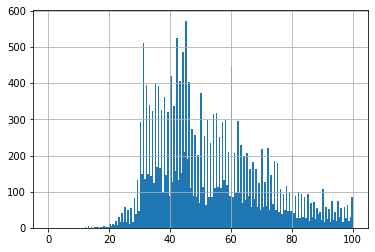

In [32]:
display(data['total_area'].describe())
data['total_area'].hist(range =(0,100), bins =200) 

**Общая площадь** распределние похоже на нормальное, больше всего квартир выставлено с площадью окло 50 квадратных метров, что видно и через описание и по графику, на значение 50 приходится пик. Также пик на 30 кв м (однушки-хрущевки) и 42кв м(новые однушки).

count    23650.000000
mean        34.091359
std         21.169359
min          2.000000
25%         19.000000
50%         30.000000
75%         41.037500
max        409.700000
Name: living_area, dtype: float64

<AxesSubplot:>

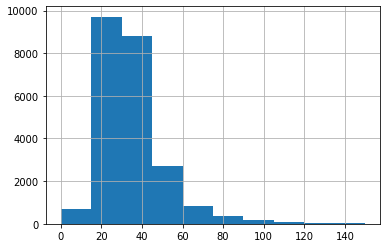

In [33]:
display(data['living_area'].describe()) 
data['living_area'].hist(range =(0,150))
#вызываю функцию describe для своего удобства, чтобы было проще построить более информативную 
#гистограмму(отрегулировать range и bins) и сверить распределение.

**Жилая площадь** распределение похоже на нормальное, по графику и при описании столбца видно, что наиболее частые вариант квартир с размером жилой площади около 30 метров квадратных.

count    23650.000000
mean        10.425715
std          5.628088
min          1.300000
25%          7.300000
50%          9.100000
75%         11.427500
max        112.000000
Name: kitchen_area, dtype: float64

<AxesSubplot:>

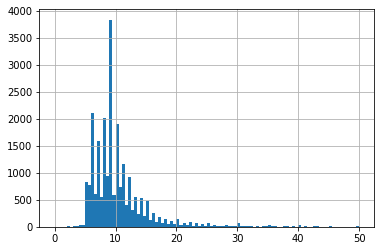

In [34]:
display(data['kitchen_area'].describe())
data['kitchen_area'].hist(range =(0,50), bins =100)

**Площадь кухни** распределение нормальное, по графику и при описании видно, что наиболее встречаемый размер кухонь около 9 метров квадратных.

count    2.365000e+04
mean     6.541127e+06
std      1.089640e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.799000e+06
max      7.630000e+08
Name: last_price, dtype: float64

<AxesSubplot:>

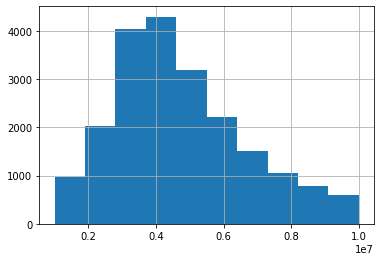

In [35]:
display(data['last_price'].describe())
data['last_price'].hist(range=(1000000, 10000000))

**Цена** распределение похоже на нормальное, по графику и описанию видно, что чаще продавались квартры в районе 4,5 миллионов рублей.

count    23650.000000
mean         2.070106
std          1.078620
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

<AxesSubplot:>

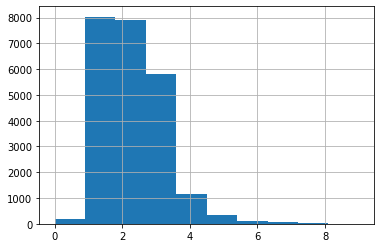

In [36]:
display(data['rooms'].describe())
data['rooms'].hist(range =(0,9))

**Количество комнат** наиболее продаваемые квартиры - двухкомнатные.

count    23650.000000
mean         2.698005
std          0.231325
min          2.200000
25%          2.600000
50%          2.650000
75%          2.700000
max          8.300000
Name: ceiling_height, dtype: float64

<AxesSubplot:>

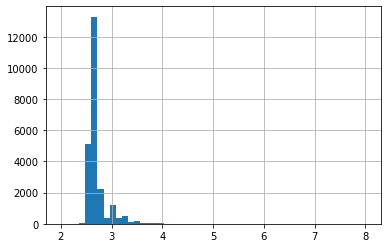

In [37]:
display(data['ceiling_height'].describe())
data['ceiling_height'].hist(range =(2,8), bins = 50)

**Высота потолков** средняя высота потолков в продаваемых квартирах в диапозоне от 2,5 метров до 3. Распределение нормальное.

count    23650.000000
mean         5.893277
std          4.883317
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

<AxesSubplot:>

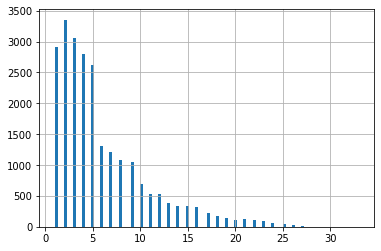

In [38]:
display(data['floor'].describe())
data['floor'].hist(range =(1,33), bins =100)

**Этаж** этажность домов небольшая, только около половины объявлений это пятиэтажные дома и ниже. Многоэтажные домов(более 10 этажей представлено менее 25%).

count      23650
unique         3
top       Другой
freq       17408
Name: floor_type, dtype: object

<AxesSubplot:>

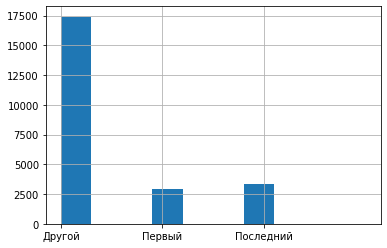

In [39]:
display(data['floor_type'].describe())
data['floor_type'].hist(range =(0,3))

**Всего этажей** больше всего квартир не на первом и не на последнем этаже.

count    18139.000000
mean     14197.860742
std       8606.830295
min        181.000000
25%       9241.000000
50%      13105.000000
75%      16293.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64

<AxesSubplot:>

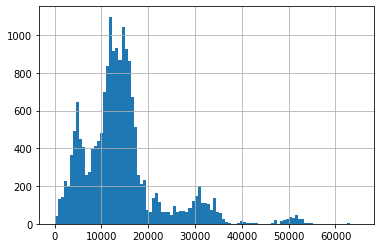

In [40]:
display(data['city_centers_nearest'].describe())
data['city_centers_nearest'].hist(range = (0,65000), bins =100)

**Расстояние до центра в метрах** наибольшее количество объявлений это квартиры, находящиеся на растоянии от центра примерно в 10-15 км.

count    18116.000000
mean     28803.225878
std      12637.314144
min          0.000000
25%      18575.750000
50%      26756.500000
75%      37294.000000
max      84869.000000
Name: airports_nearest, dtype: float64

<AxesSubplot:>

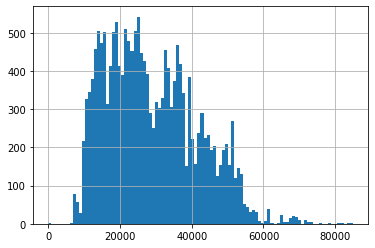

In [41]:
display(data['airports_nearest'].describe())
data['airports_nearest'].hist(bins =100)

**Расстояние до ближайшего аэропорта** расстояние до ближайшего аэропорта(Пулково) составяляет примерно от 20 до 30 км, наибольшее количесвто предложений находится на расстоянии примерно 25 км.

count    8064.000000
mean      490.830729
std       342.554386
min         1.000000
25%       288.000000
50%       454.500000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

<AxesSubplot:>

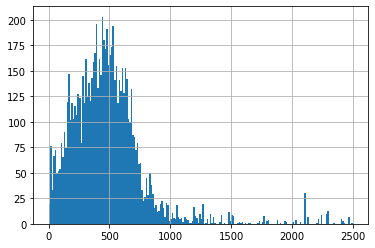

In [42]:
display(data['parks_nearest'].describe())
data['parks_nearest'].hist(range=(0,2500), bins =200)

**Расстояние до ближайшего парка** продаваемые квартиры находятся в благоприятных зеленых зонах, так как расстояния до парка примерно 500 метров.

count    23650.000000
mean         6.401564
std          3.491418
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: month_of_publication, dtype: float64

<AxesSubplot:>

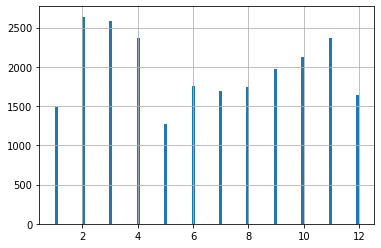

In [43]:
display(data['month_of_publication'].describe()) #месяц публикации
data['month_of_publication'].hist(range =(1,12), bins =100)

count    23650.000000
mean      2017.370021
std          1.037806
min       2014.000000
25%       2017.000000
50%       2017.000000
75%       2018.000000
max       2019.000000
Name: year_of_publication, dtype: float64

<AxesSubplot:>

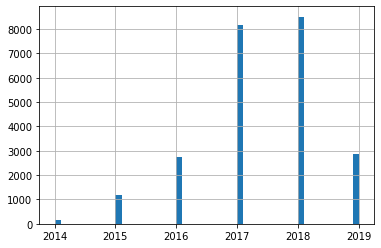

In [44]:
display(data['year_of_publication'].describe())
data['first_day_exposition'].sort_values(ascending=False)
data['year_of_publication'].hist(range =(2014,2019), bins =50)

**Год публикации** в период с 2014 по 2019 год наблюдался рост количества публикаций, пик пришелся на 2017 и 2018 год, когда в РФ была наименьший процент инфляции. В данных за 2014 и 2019 года представлены объявления меньше, чем за полгода, поэтому информативность по этим годам неполная.

### Актуальность объявлений

In [45]:
data['days_exposition'].describe()

count    20470.000000
mean       180.753200
std        219.777916
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

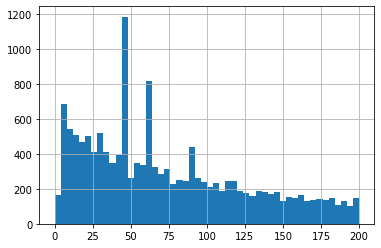

In [46]:
data['days_exposition'].hist(range =(0,200), bins =50);

**Длительность публикации объявления** с быстрыми продажами возможно следует считать те, что продались в первый месяц с момента публикации, долгими те, что не продаются больше 9 месяцев. Чем дольше "висит" объявление на сайте, тем менее привлекательным и более подозрительным оно становится для потенциального покупателя. Распределене Пуассона получилось, так как описывается событие на промежутке времени. Наибольшее количество продаж происходило через месяц, два месяца и три месяца с момента публикации объявления. 

### Изучение влияния факторов на стоимость проекта

<AxesSubplot:xlabel='last_price'>

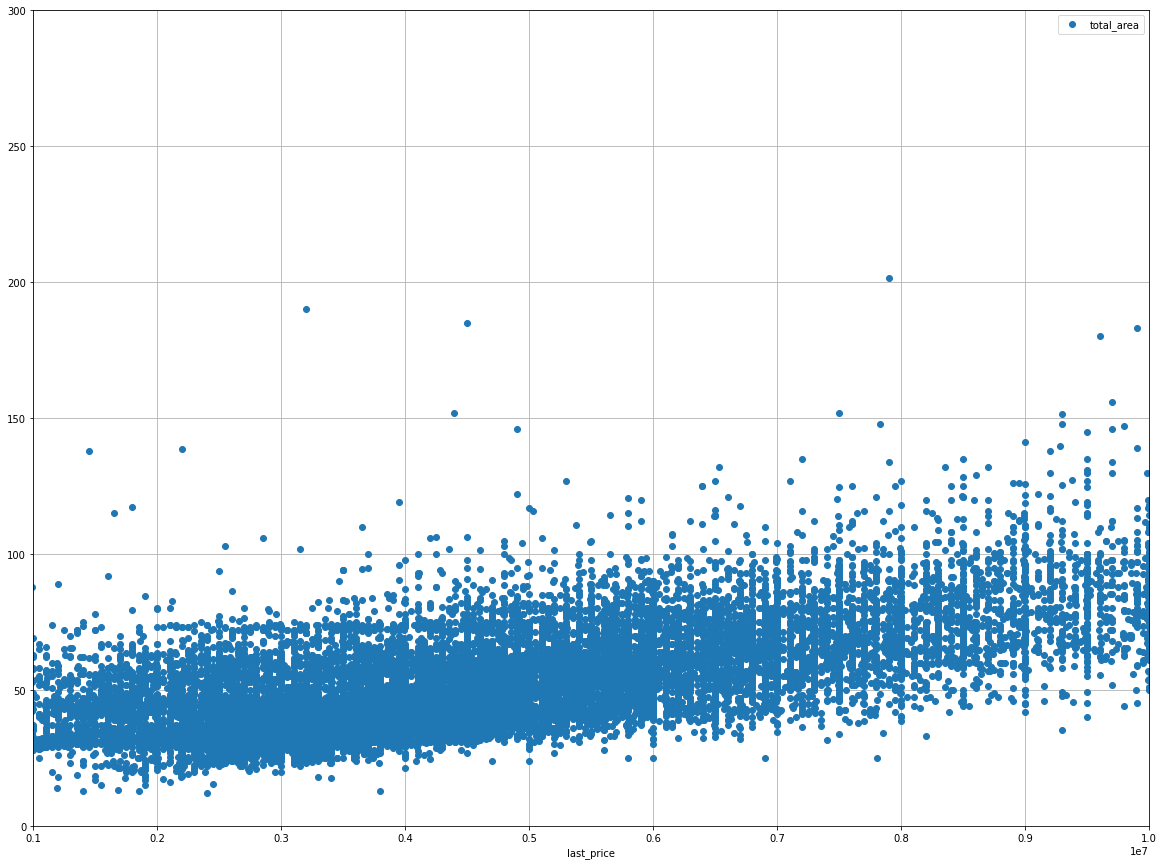

In [47]:
data.plot(x= 'last_price', y='total_area', style ='o', xlim=(1000000, 10000000), ylim=(0,300), grid=True, figsize=(20,15))

In [48]:
data['last_price'].corr(data['total_area']) #подсчитаю коэффициент корреляции 
#Цена в зависимости от общей площади квартиры

0.6537428966335393

<AxesSubplot:xlabel='last_price', ylabel='living_area'>

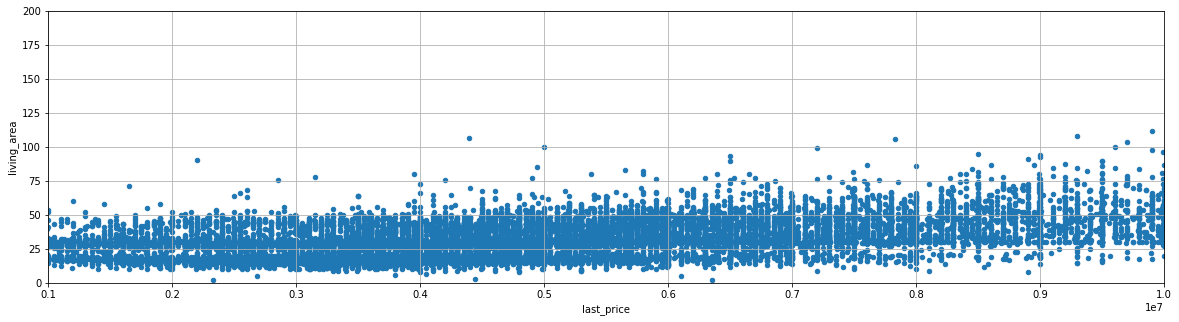

In [49]:
data.plot(x= 'last_price', y='living_area', xlim=(1000000, 10000000), ylim=(0,200), grid=True, figsize=(20,5), kind ='scatter')

In [50]:
data['last_price'].corr(data['living_area']) #подсчитаю коэффициент корреляции 
#Цена в зависимости от жилой площади

0.5406987158876255

<AxesSubplot:xlabel='last_price'>

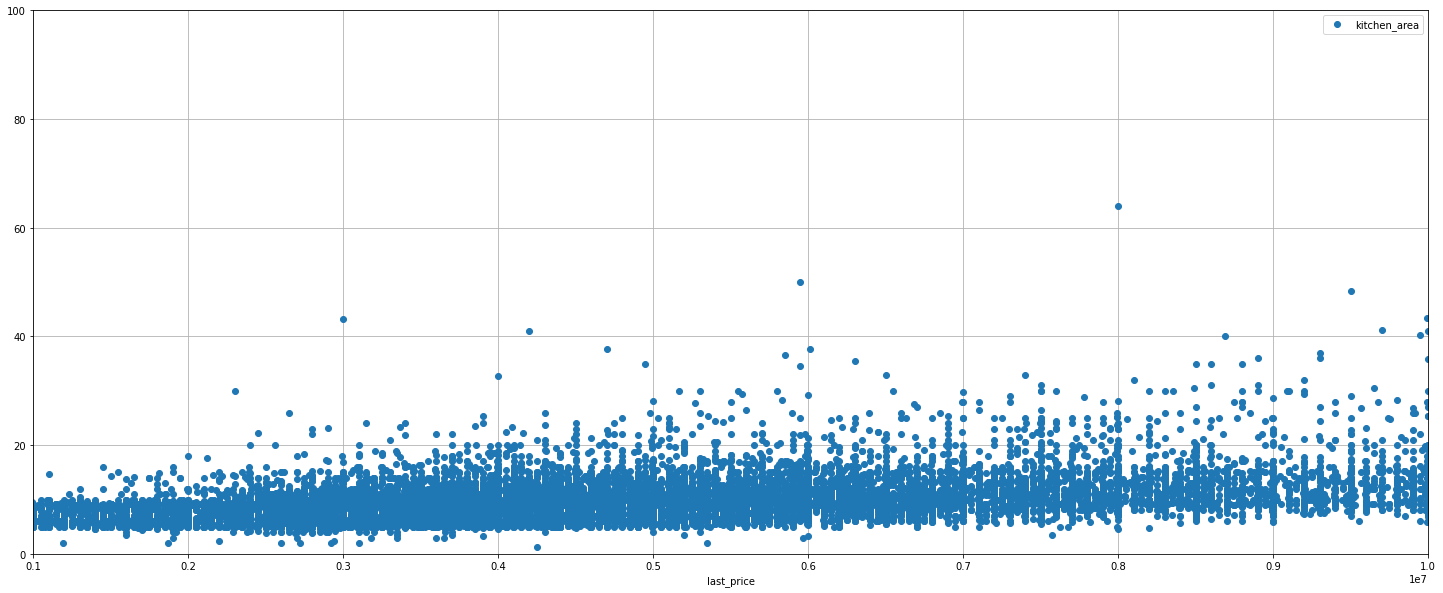

In [51]:
data.plot(x= 'last_price', y='kitchen_area', style ='o', xlim=(1000000, 10000000), ylim=(0,100), grid=True, figsize=(25,10))

In [52]:
data['last_price'].corr(data['kitchen_area']) #подсчитаю коэффициент корреляции
#Цена в зависимоти от площади кухни

0.4406021561153903

<AxesSubplot:xlabel='rooms'>

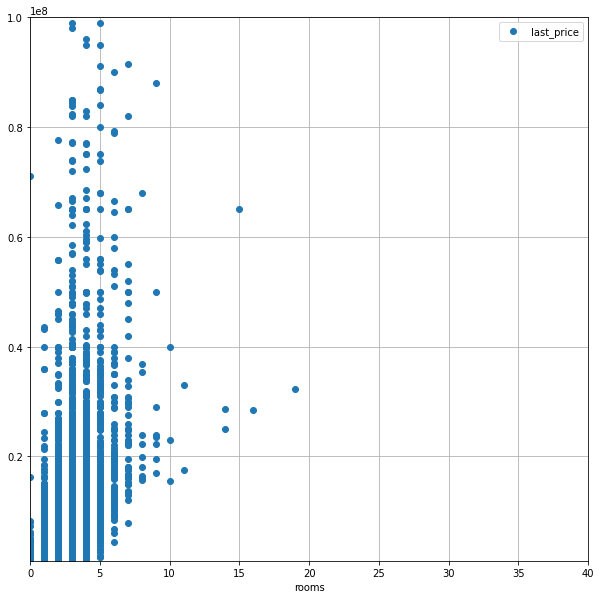

In [53]:
data.plot(y= 'last_price', x='rooms', style='o', ylim=(1000000, 100000000), xlim=(0,40), grid=True, figsize=(10,10))

In [54]:
data['last_price'].corr(data['rooms']) #подсчитаю коэффициент корреляции
#Цена в зависимости от количества комнат

0.36342062218770704

,25%,50%,75%,count,max,mean,min,std
floor_type,,,,,,,,
Другой,3600000.0,4850000.0,7000000.0,17408.0,330000000.0,6.675825e+06,450000.0,8.619038e+06
Первый,2800000.0,3900000.0,5400000.0,2887.0,135000000.0,4.817890e+06,430000.0,5.113009e+06
Последний,2990000.0,4300000.0,6700000.0,3355.0,763000000.0,7.325077e+06,12190.0,2.063652e+07


<AxesSubplot:ylabel='floor_type'>

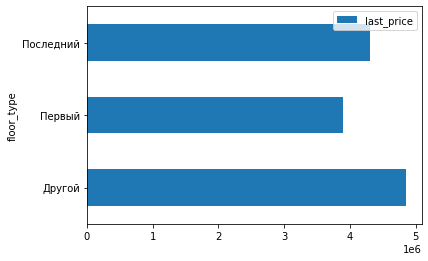

In [55]:
display(data.pivot_table(index = {'floor_type'}, values='last_price', aggfunc='describe'))
data.pivot_table(index = {'floor_type'}, values='last_price', aggfunc='median').plot(kind='barh')
#вызвала фунциюdescribe, чтобы оценить рапределения
#Цена в зависимости от типа этажа

,25%,50%,75%,count,max,mean,min,std
day_of_publication,,,,,,,,
0,3450000.0,4650000.0,6700000.0,3606.0,300000000.0,6.510815e+06,430000.0,9.638510e+06
1,3435000.0,4720000.0,6800000.0,4175.0,289238400.0,6.393782e+06,430000.0,8.608384e+06
2,3426000.0,4700000.0,6900000.0,3966.0,420000000.0,6.626416e+06,12190.0,1.179381e+07
3,3450000.0,4650000.0,6987500.0,4286.0,159984000.0,6.711767e+06,450000.0,8.477375e+06
4,3432625.0,4577500.0,6700000.0,3992.0,190870000.0,6.364605e+06,450000.0,8.538570e+06
5,3380000.0,4575000.0,6600000.0,1933.0,763000000.0,6.982510e+06,550000.0,2.166142e+07
6,3400000.0,4550000.0,6500000.0,1692.0,130000000.0,6.249360e+06,470000.0,7.910526e+06


<AxesSubplot:ylabel='day_of_publication'>

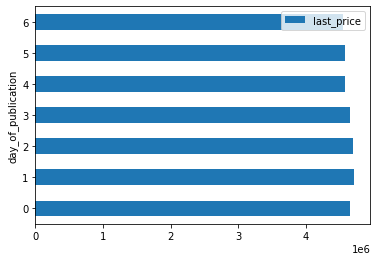

In [56]:
display(data.pivot_table(index = {'day_of_publication'}, values='last_price', aggfunc='describe'))
data.pivot_table(index = {'day_of_publication'}, values='last_price', aggfunc='median').plot(kind='barh')
#Цена в зависимости от дня недели

,25%,50%,75%,count,max,mean,min,std
month_of_publication,,,,,,,,
1,3390000.0,4600000.0,6850000.0,1491.0,180000000.0,6.666975e+06,480000.0,9.362038e+06
2,3380000.0,4650000.0,6750000.0,2639.0,401300000.0,6.464463e+06,450000.0,1.034975e+07
3,3400000.0,4650000.0,6600000.0,2582.0,289238400.0,6.362919e+06,12190.0,9.587757e+06
4,3500000.0,4800000.0,6860000.0,2373.0,330000000.0,6.742671e+06,430000.0,1.255519e+07
5,3440000.0,4500000.0,6799750.0,1270.0,230000000.0,6.594777e+06,490000.0,1.003612e+07
6,3300000.0,4400000.0,6500000.0,1755.0,124480000.0,6.311184e+06,430000.0,8.090860e+06
7,3450000.0,4650000.0,6900000.0,1690.0,140000000.0,6.641336e+06,440000.0,9.095383e+06
8,3400000.0,4570000.0,6700000.0,1742.0,159984000.0,6.352839e+06,450000.0,7.936747e+06
9,3475000.0,4700000.0,6995000.0,1979.0,763000000.0,6.828471e+06,520000.0,1.846155e+07


<AxesSubplot:ylabel='month_of_publication'>

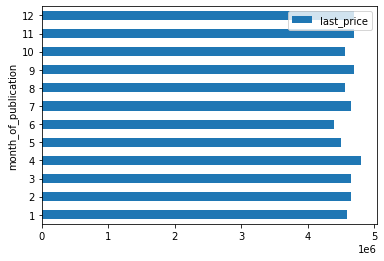

In [57]:
display(data.pivot_table(index = {'month_of_publication'}, values='last_price', aggfunc='describe'))
data.pivot_table(index = {'month_of_publication'}, values='last_price', aggfunc='median').plot(kind='barh')
#Цена в зависимоти от месяца публикации

,25%,50%,75%,count,max,mean,min,std
year_of_publication,,,,,,,,
2014,4416237.5,7640000.0,14488750.0,136.0,79339000.0,1.204660e+07,1200000.0,1.255694e+07
2015,3750000.0,5350000.0,8290000.0,1173.0,180000000.0,8.592727e+06,650000.0,1.338975e+07
2016,3400000.0,4550000.0,6800000.0,2765.0,401300000.0,6.829415e+06,490000.0,1.208295e+07
2017,3350000.0,4500000.0,6700000.0,8185.0,763000000.0,6.585822e+06,450000.0,1.342025e+07
2018,3350000.0,4550000.0,6500000.0,8512.0,330000000.0,5.952216e+06,430000.0,7.170299e+06
2019,3700000.0,5050000.0,7200000.0,2879.0,289238400.0,6.782388e+06,12190.0,9.300943e+06


<AxesSubplot:ylabel='year_of_publication'>

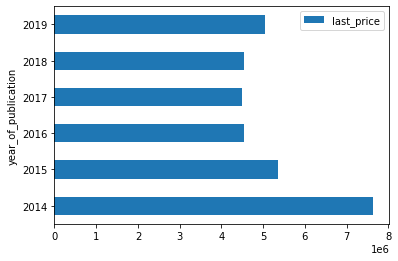

In [58]:
display(data.pivot_table(index = {'year_of_publication'}, values='last_price', aggfunc='describe'))
data.pivot_table(index = {'year_of_publication'}, values='last_price', aggfunc='median').plot(kind='barh')
#Цена в зависимости от года публикации

,25%,50%,75%,count,max,mean,min,std
year_of_publication,,,,,,,,
2014,81703.472741,106901.898734,144282.721951,136.0,5.024250e+05,124302.355703,20338.983051,70670.939527
2015,77586.206897,93396.226415,115625.000000,1173.0,7.192982e+05,104719.098541,12542.372881,61168.264385
2016,74600.355240,91666.666667,110925.925926,2765.0,1.000748e+06,98295.372599,11587.301587,50842.556134
2017,75510.527149,92569.659443,110638.297872,8185.0,1.907500e+06,97637.360152,10714.285714,50590.026013
2018,76228.861795,95704.323236,114484.398553,8512.0,1.736842e+06,97800.065860,7962.962963,44701.256994
2019,83333.333333,103305.785124,123809.523810,2879.0,1.542605e+06,107123.780305,111.834862,57235.119954


<AxesSubplot:ylabel='year_of_publication'>

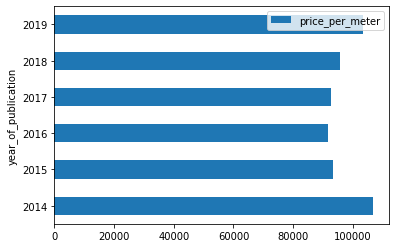

In [59]:
display(data.pivot_table(index = {'year_of_publication'}, values='price_per_meter', aggfunc='describe'))
data.pivot_table(index = {'year_of_publication'}, values='price_per_meter', aggfunc='median').plot(kind='barh')

,25%,50%,75%,count,max,mean,min,std
year_of_publication,,,,,,,,
2014,51.85,76.18,105.400,136.0,280.0,86.225956,31.0,44.905657
2015,44.00,60.00,83.000,1173.0,507.0,71.569923,18.0,45.264169
2016,41.00,53.02,71.800,2765.0,500.0,62.143852,18.9,36.085395
2017,40.00,52.00,70.000,8185.0,900.0,60.746788,12.0,37.859127
2018,39.10,50.50,66.925,8512.0,470.3,57.666359,13.0,30.294586
2019,40.55,52.00,67.600,2879.0,631.2,59.467864,13.0,37.044997


<AxesSubplot:ylabel='year_of_publication'>

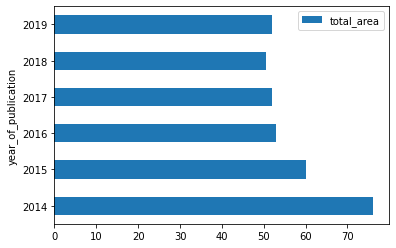

In [60]:
display(data.pivot_table(index = {'year_of_publication'}, values='total_area', aggfunc='describe'))
data.pivot_table(index = {'year_of_publication'}, values='total_area', aggfunc='median').plot(kind='barh')
#Динамика цены за метр и метража продаваемых квартир в период с 2014 по 2019гг

### Изучение средней цены одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

In [61]:
data['city'].value_counts().head(10) #10 населенных пунктов с наибольшим количеством публикаций.

Санкт-Петербург      15721
поселок Мурино         556
поселок Шушары         440
Всеволожск             398
Пушкин                 369
Колпино                338
поселок Парголово      327
Гатчина                307
поселок Кудрово        299
Выборг                 237
Name: city, dtype: int64

In [62]:
city_10 = data.pivot_table(index = 'city', values = ['price_per_meter', 'last_price','floor'], aggfunc={'city': 'count', 'price_per_meter': 'mean', 'last_price': 'mean'})
city_10.columns = ['count_ads','final_price_kv', 'mean_price']
city_10_new = city_10.sort_values(by = 'count_ads', ascending = False).head(10) #цены по топ 10 населенным пунктам
display(city_10_new['mean_price'].max()) #максимальная цена за квадратный метр из 10 наиболее популярных городов
display(city_10_new['mean_price'].min()) #минимальная цена за квадратный метр из 10 наиболее популярных городов
city_10_new

114849.00879387358

58141.909153318615

,count_ads,final_price_kv,mean_price
city,,,
Санкт-Петербург,15721,8.062507e+06,114849.008794
поселок Мурино,556,3.652361e+06,85681.762601
поселок Шушары,440,4.108082e+06,78677.364217
Всеволожск,398,3.789068e+06,68654.473986
Пушкин,369,6.469036e+06,103125.819291
Колпино,338,3.964021e+06,75424.579098
поселок Парголово,327,4.488075e+06,90175.913458
Гатчина,307,3.488337e+06,68746.146763
поселок Кудрово,299,4.234158e+06,92473.547576


### Вычисление средней цены квадратного метра по степени удаления от центра (в километрах)

                 price_per_meter
round_to_center                 
0.0                172619.047619
1.0                128485.110056
2.0                123035.513418
3.0                108469.112355
4.0                117952.262904
5.0                127093.283865
6.0                131835.227273
7.0                127017.083563
8.0                122944.928910
9.0                105813.953488
10.0               106451.612903
11.0               103552.582241
12.0               103988.603989
13.0               104081.632653
14.0               101865.136298
15.0               101300.981554
16.0                97500.000000
17.0                94202.898551
18.0                95000.000000
19.0                97241.379310
20.0               103703.693333
21.0                89705.882353
22.0                88781.474414
23.0                89965.397924
24.0                86353.290416
25.0                93612.162162
26.0                89393.939394
27.0               132115.709459
28.0      

<AxesSubplot:xlabel='round_to_center'>

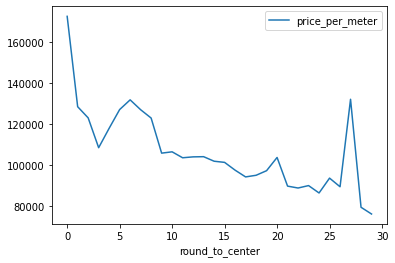

In [65]:
spb = data.query('city == "Санкт-Петербург"')
km_price = spb.pivot_table(index ='round_to_center', values = 'price_per_meter', aggfunc ='median')
print(km_price)
km_price.plot() 

## Общий вывод

- Больше всего квартир выставлено с площадью около 32-50 квадратных метров, наиболее частые вариант квартир с размером жилой площади около 30 метров квадратных, также продаваемые 33 и 42 квадрата(однушка старого и нового образца), а наиболее встречаемый размер кухонь около 9 метров квадратных. Наиболее продаваемые квартиры - двухкомнатные. Этаж этажность домов небольшая, только около половины объявлений это пятиэтажные дома и ниже. Многоэтажные домов(более 10 этажей представлено менее 25%), при этом больше всего квартир не на первом и не на последнем этаже. Наибольшее количество объявлений это квартиры, находящиеся на растоянии от центра примерно в 10-15 км. Расстояние до ближайшего аэропорта(Пулково) составяляет примерно от 20 до 30 км, наибольшее количесвто предложений находится на расстоянии примерно 25 км. Продаваемые квартиры находятся в благоприятных зеленых зонах, так как расстояния до парка примерно 500 метров.
- Чаще всего объявления публикуются в феврале, марте, апреле, ноябре. Наименьшее количество публикаций в мае. Объявления с быстрыми продажами возможно следует считать те, что продались в первый месяц с момента публикации, долгими те, что не продаются больше 9 месяцев. Пиками продаж можно считать первый, второй и третий месяц с момента публикации. Чем дольше "висит" объявление на сайте, тем менее привлекательным и более подозрительным оно становится для потенциального покупателя. 
- Цена зависит от общей площади квартры, количества комнат, этажа. Не влияет жилая площадь, площадь кухни.
- Чаще продавались квартры в районе 4,5 миллионов рублей. Стоимость за квадратный метр по мере удаления от центра Санкт_Петербурга: в пределах первых 15 километров от центра цена не опускается ниже 100 тысяч за квадрат, далее снижается до 76 тысяч за метр на расстоянии 29 км от центра. Квартиры находящиеся в непосредственном центре (первые 5 км) Санкт-Петербурга стоят за квадратный метр дороже всего - от 250 тысяч до 125 тысяч. Дальше начинается Ленинградская область. больше всего объявлений в насленных пунктах: Санкт-Петербург, поселок Мурино, поселок Шушары, Всеволожск, Пушкин, Колпино, поселок Парголово, Гатчина, поселок Кудрово, Выборг. Минимальная цена за квадратный метр составила: 58142 рублей, максимальная: 114849 рублей. В 2014 и 2019 году цена за квадратный метр была больше, чем на протяжении 2015-2018 годов, что составило около 100 и 75 соответственно. Но следует отметить, что на рынке со врменем стали превалировать квартиры с меньшей площадью, средний метраж снизился на 20%(студии и однушки люди стали чаще брать, тк они им кажутся более выгодными по деньгам).
- В ходе исследования было выполнено ознакомление с данными, их предобработка, сцелью улучшить их качество и сделать более точные выводы. Далее производились необходимые расчеты. Данные представлены в виде расчетов и визуальных структур с целью более комплексного и понятного восприятия.